#### Import and define functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_paras(group):
    run_list = np.genfromtxt("results/runs_"+group+".txt",comments=None, dtype=str)[:,0]
    paras, errors = np.empty([len(run_list), max_channel, 6]), np.empty([len(run_list), max_channel, 6])
    
    for i, run in enumerate(run_list):
        for j in range(max_channel):
            channel = j+1
            file = np.genfromtxt("data/"+run+"/Fit_Ch0"+str(channel)+".dat",comments=None)
        
            paras[i,j,0], errors[i,j,0] = file[0,1]+file[10,1], file[0,2]+file[10,2]  #pedestal
            paras[i,j,1], errors[i,j,1] = file[1,1],            file[1,2]             #scale
            paras[i,j,2], errors[i,j,2] = file[2,1],            file[2,2]             #sigma
            paras[i,j,3], errors[i,j,3] = file[3,1],            file[3,2]             #mu
            paras[i,j,4], errors[i,j,4] = file[4,1],            file[4,2]             #nu
            paras[i,j,5], errors[i,j,5] = file[11,1],           file[11,2]            #chi^2/NDF
            
    return paras, errors

#### PMT A Gain 4%, 5 parameters

Text(0, 0.5, 'v1')

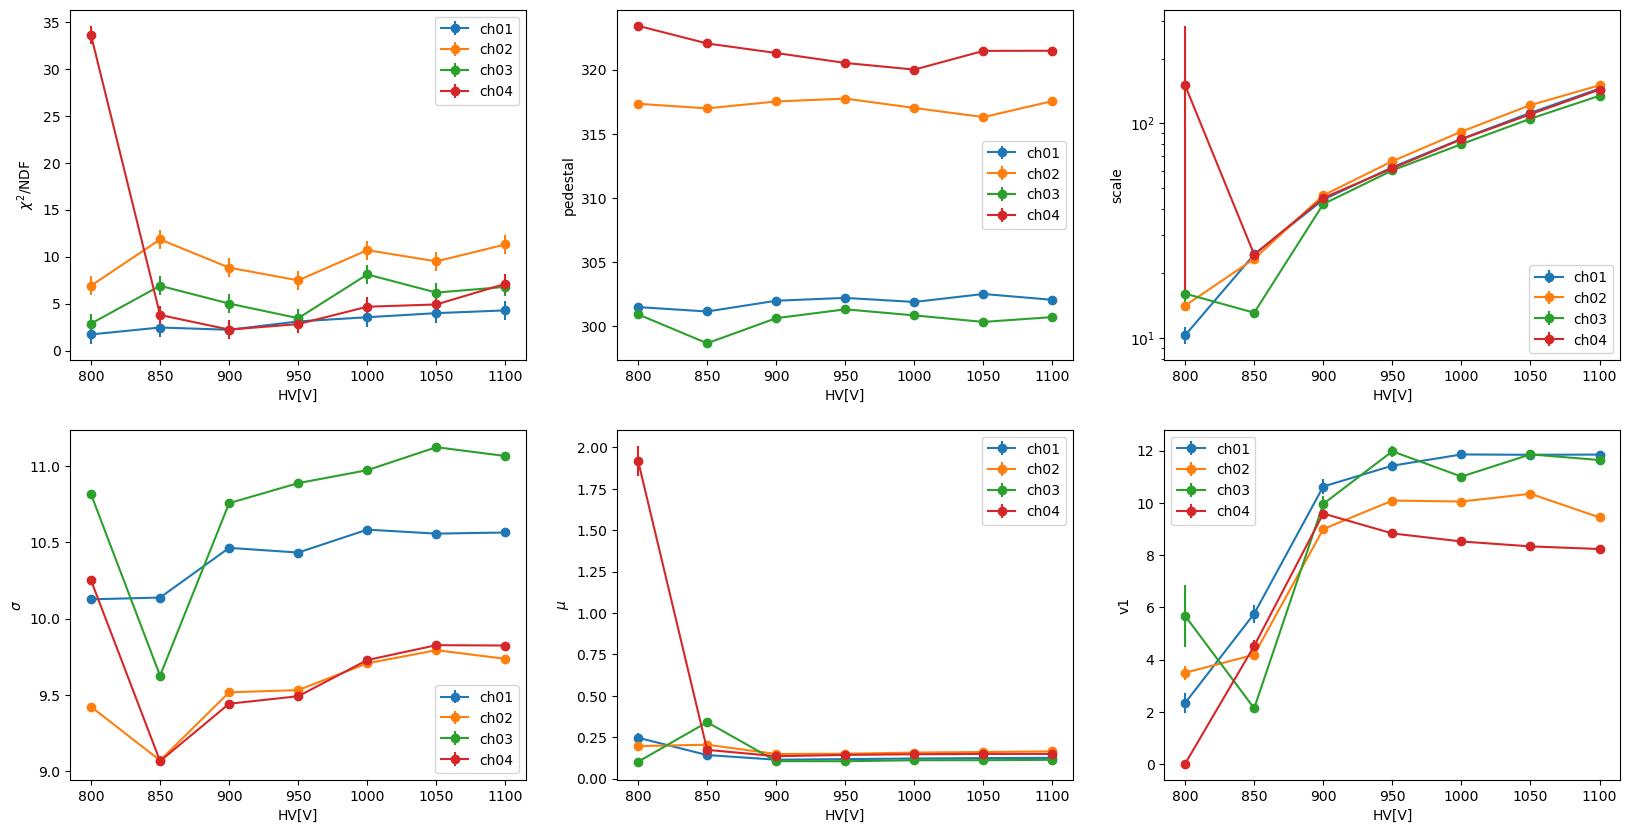

In [29]:
fig, axs = plt.subplots(2,3, figsize=(20,10), dpi=100)

paras = np.loadtxt("results/a_gain_4%/paras_iter01_5para.txt")
xpoints = np.loadtxt("results/a_gain_4%/runs.txt")[:,1]
for i in range(4):
    axs[0,0].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 3], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 13], label="ch0"+str(i+1), fmt='o-')
axs[0,0].legend()
axs[0,0].set_xlabel('HV[V]')
axs[0,0].set_ylabel(r"$\chi^2$/NDF")

for i in range(4):
    axs[0,1].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 4], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 14], label="ch0"+str(i+1), fmt='o-')
axs[0,1].legend()
axs[0,1].set_xlabel('HV[V]')
axs[0,1].set_ylabel("pedestal")

for i in range(4):
    axs[0,2].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 5], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 15], label="ch0"+str(i+1), fmt='o-')
axs[0,2].legend()
axs[0,2].set_xlabel('HV[V]')
axs[0,2].set_ylabel("scale")
axs[0,2].set_yscale('log')

for i in range(4):
    axs[1,0].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 6], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 16], label="ch0"+str(i+1), fmt='o-')
axs[1,0].legend()
axs[1,0].set_xlabel('HV[V]')
axs[1,0].set_ylabel(r"$\sigma$")

for i in range(4):
    axs[1,1].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 7], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 17], label="ch0"+str(i+1), fmt='o-')
axs[1,1].legend()
axs[1,1].set_xlabel('HV[V]')
axs[1,1].set_ylabel(r"$\mu$")

for i in range(4):
    axs[1,2].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 8], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 18], label="ch0"+str(i+1), fmt='o-')
axs[1,2].legend()
axs[1,2].set_xlabel('HV[V]')
axs[1,2].set_ylabel("v1")

#### PMT A Gain 8%, 5 parameters

Text(0, 0.5, 'v1')

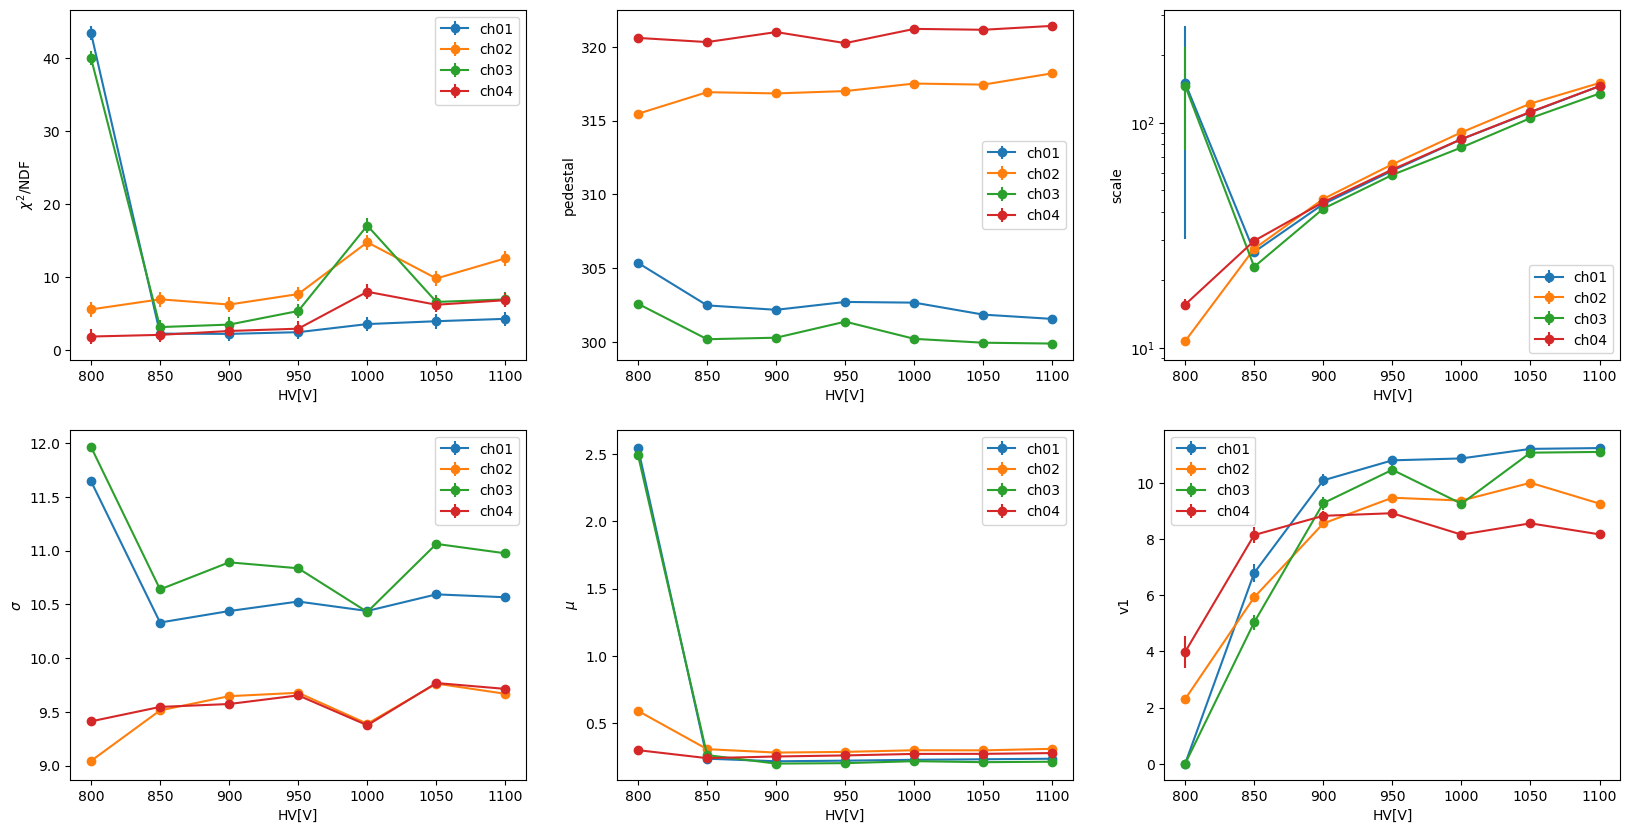

In [30]:
fig, axs = plt.subplots(2,3, figsize=(20,10), dpi=100)

paras = np.loadtxt("results/a_gain_8%/paras_iter01_5para.txt")
xpoints = np.loadtxt("results/a_gain_8%/runs.txt")[:,1]
for i in range(4):
    axs[0,0].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 3], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 13], label="ch0"+str(i+1), fmt='o-')
axs[0,0].legend()
axs[0,0].set_xlabel('HV[V]')
axs[0,0].set_ylabel(r"$\chi^2$/NDF")

for i in range(4):
    axs[0,1].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 4], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 14], label="ch0"+str(i+1), fmt='o-')
axs[0,1].legend()
axs[0,1].set_xlabel('HV[V]')
axs[0,1].set_ylabel("pedestal")

for i in range(4):
    axs[0,2].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 5], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 15], label="ch0"+str(i+1), fmt='o-')
axs[0,2].legend()
axs[0,2].set_xlabel('HV[V]')
axs[0,2].set_ylabel("scale")
axs[0,2].set_yscale('log')

for i in range(4):
    axs[1,0].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 6], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 16], label="ch0"+str(i+1), fmt='o-')
axs[1,0].legend()
axs[1,0].set_xlabel('HV[V]')
axs[1,0].set_ylabel(r"$\sigma$")

for i in range(4):
    axs[1,1].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 7], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 17], label="ch0"+str(i+1), fmt='o-')
axs[1,1].legend()
axs[1,1].set_xlabel('HV[V]')
axs[1,1].set_ylabel(r"$\mu$")

for i in range(4):
    axs[1,2].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 8], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 18], label="ch0"+str(i+1), fmt='o-')
axs[1,2].legend()
axs[1,2].set_xlabel('HV[V]')
axs[1,2].set_ylabel("v1")

#### PMT A Light 940V off, 5 parameters

Text(0, 0.5, 'v1')

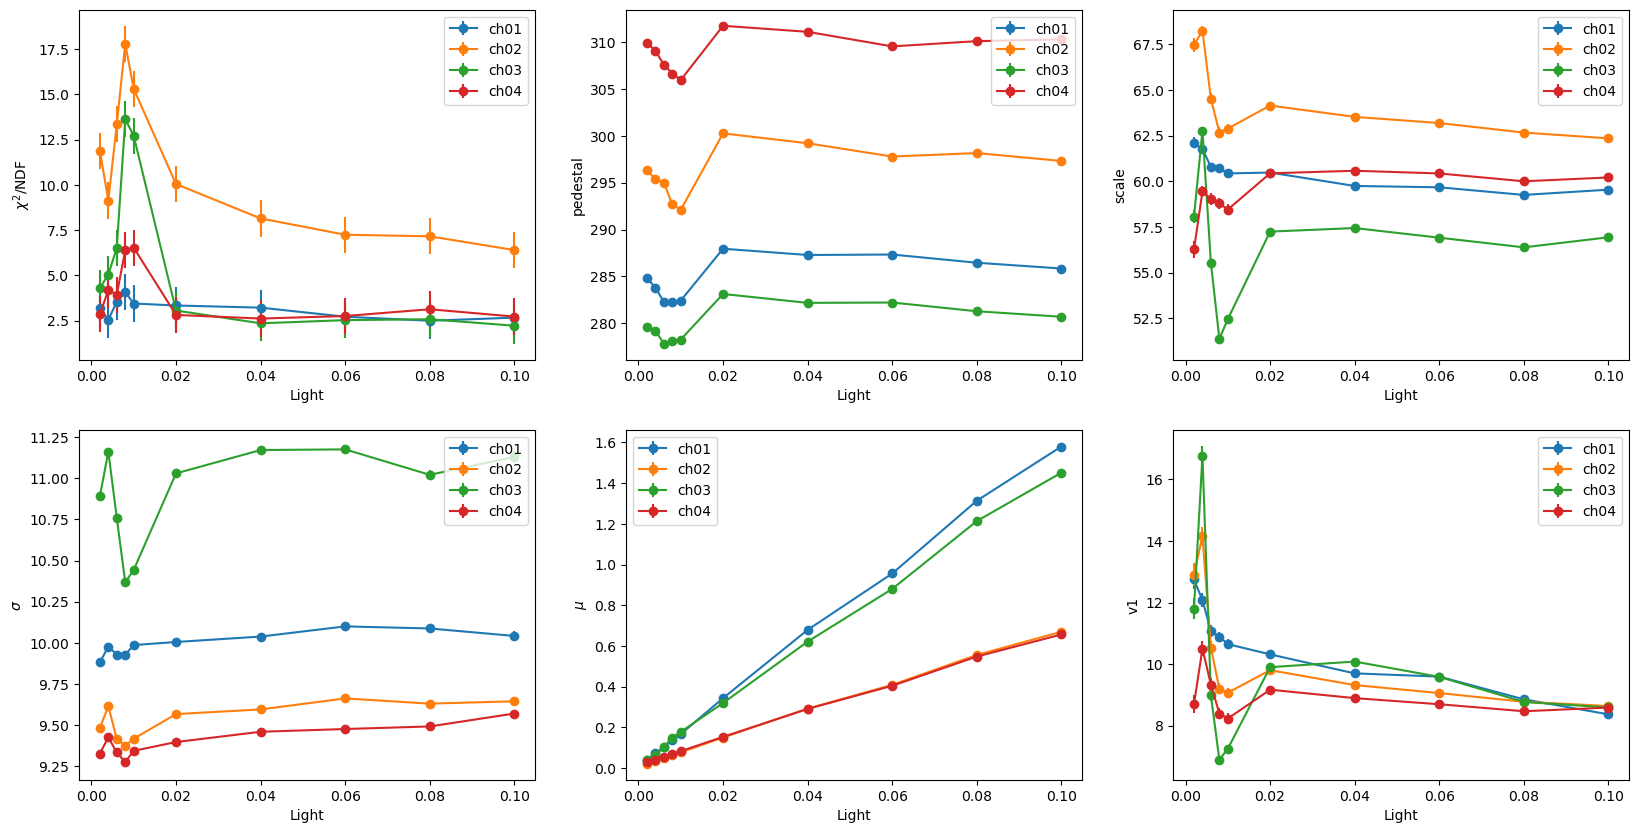

In [5]:
fig, axs = plt.subplots(2,3, figsize=(20,10), dpi=100)

paras = np.loadtxt("results/a_light_940V_off/paras_iter01_5para.txt")
xpoints = np.loadtxt("results/a_light_940V_off/runs.txt")[:,1]
for i in range(4):
    axs[0,0].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 3], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 13], label="ch0"+str(i+1), fmt='o-')
axs[0,0].legend()
axs[0,0].set_xlabel('Light')
axs[0,0].set_ylabel(r"$\chi^2$/NDF")

for i in range(4):
    axs[0,1].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 4], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 14], label="ch0"+str(i+1), fmt='o-')
axs[0,1].legend()
axs[0,1].set_xlabel('Light')
axs[0,1].set_ylabel("pedestal")

for i in range(4):
    axs[0,2].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 5], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 15], label="ch0"+str(i+1), fmt='o-')
axs[0,2].legend()
axs[0,2].set_xlabel('Light')
axs[0,2].set_ylabel("scale")

for i in range(4):
    axs[1,0].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 6], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 16], label="ch0"+str(i+1), fmt='o-')
axs[1,0].legend()
axs[1,0].set_xlabel('Light')
axs[1,0].set_ylabel(r"$\sigma$")

for i in range(4):
    axs[1,1].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 7], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 17], label="ch0"+str(i+1), fmt='o-')
axs[1,1].legend()
axs[1,1].set_xlabel('Light')
axs[1,1].set_ylabel(r"$\mu$")

for i in range(4):
    axs[1,2].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 8], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 18], label="ch0"+str(i+1), fmt='o-')
axs[1,2].legend()
axs[1,2].set_xlabel('Light')
axs[1,2].set_ylabel("v1")

#### PMT A Light 940V on, 5 parameters

Text(0, 0.5, 'v1')

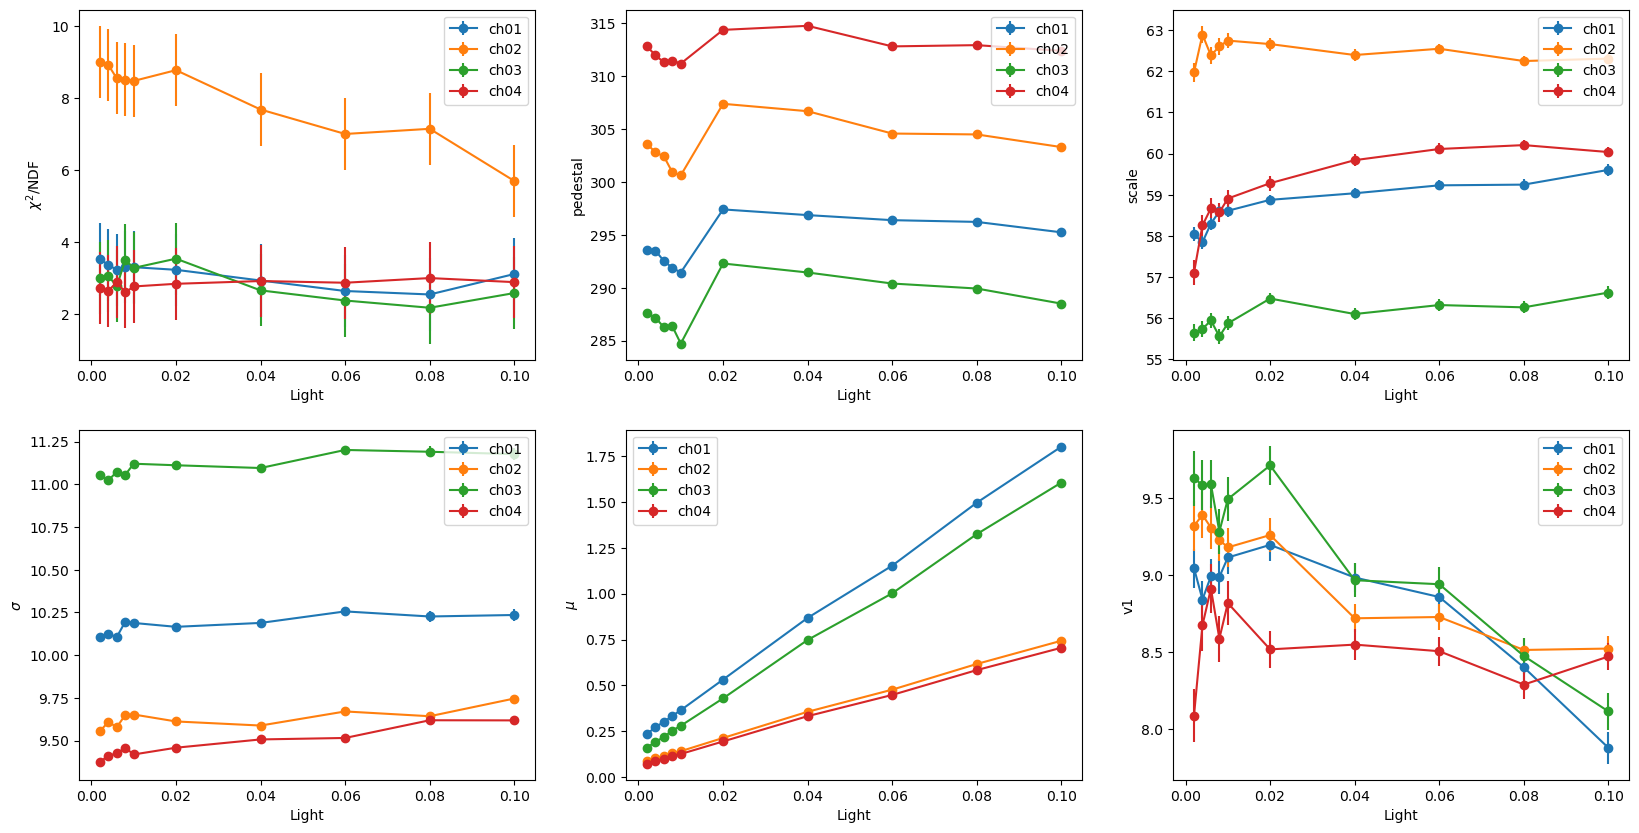

In [5]:
fig, axs = plt.subplots(2,3, figsize=(20,10), dpi=100)

paras = np.loadtxt("results/a_light_940V_on/paras_iter01_5para.txt")
xpoints = np.loadtxt("results/a_light_940V_on/runs.txt")[:,1]
for i in range(4):
    axs[0,0].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 3], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 13], label="ch0"+str(i+1), fmt='o-')
axs[0,0].legend()
axs[0,0].set_xlabel('Light')
axs[0,0].set_ylabel(r"$\chi^2$/NDF")

for i in range(4):
    axs[0,1].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 4], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 14], label="ch0"+str(i+1), fmt='o-')
axs[0,1].legend()
axs[0,1].set_xlabel('Light')
axs[0,1].set_ylabel("pedestal")

for i in range(4):
    axs[0,2].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 5], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 15], label="ch0"+str(i+1), fmt='o-')
axs[0,2].legend()
axs[0,2].set_xlabel('Light')
axs[0,2].set_ylabel("scale")

for i in range(4):
    axs[1,0].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 6], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 16], label="ch0"+str(i+1), fmt='o-')
axs[1,0].legend()
axs[1,0].set_xlabel('Light')
axs[1,0].set_ylabel(r"$\sigma$")

for i in range(4):
    axs[1,1].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 7], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 17], label="ch0"+str(i+1), fmt='o-')
axs[1,1].legend()
axs[1,1].set_xlabel('Light')
axs[1,1].set_ylabel(r"$\mu$")

for i in range(4):
    axs[1,2].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 8], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 18], label="ch0"+str(i+1), fmt='o-')
axs[1,2].legend()
axs[1,2].set_xlabel('Light')
axs[1,2].set_ylabel("v1")

#### PMT S Light 1100V off, 10 parameters

Text(0, 0.5, 'v1')

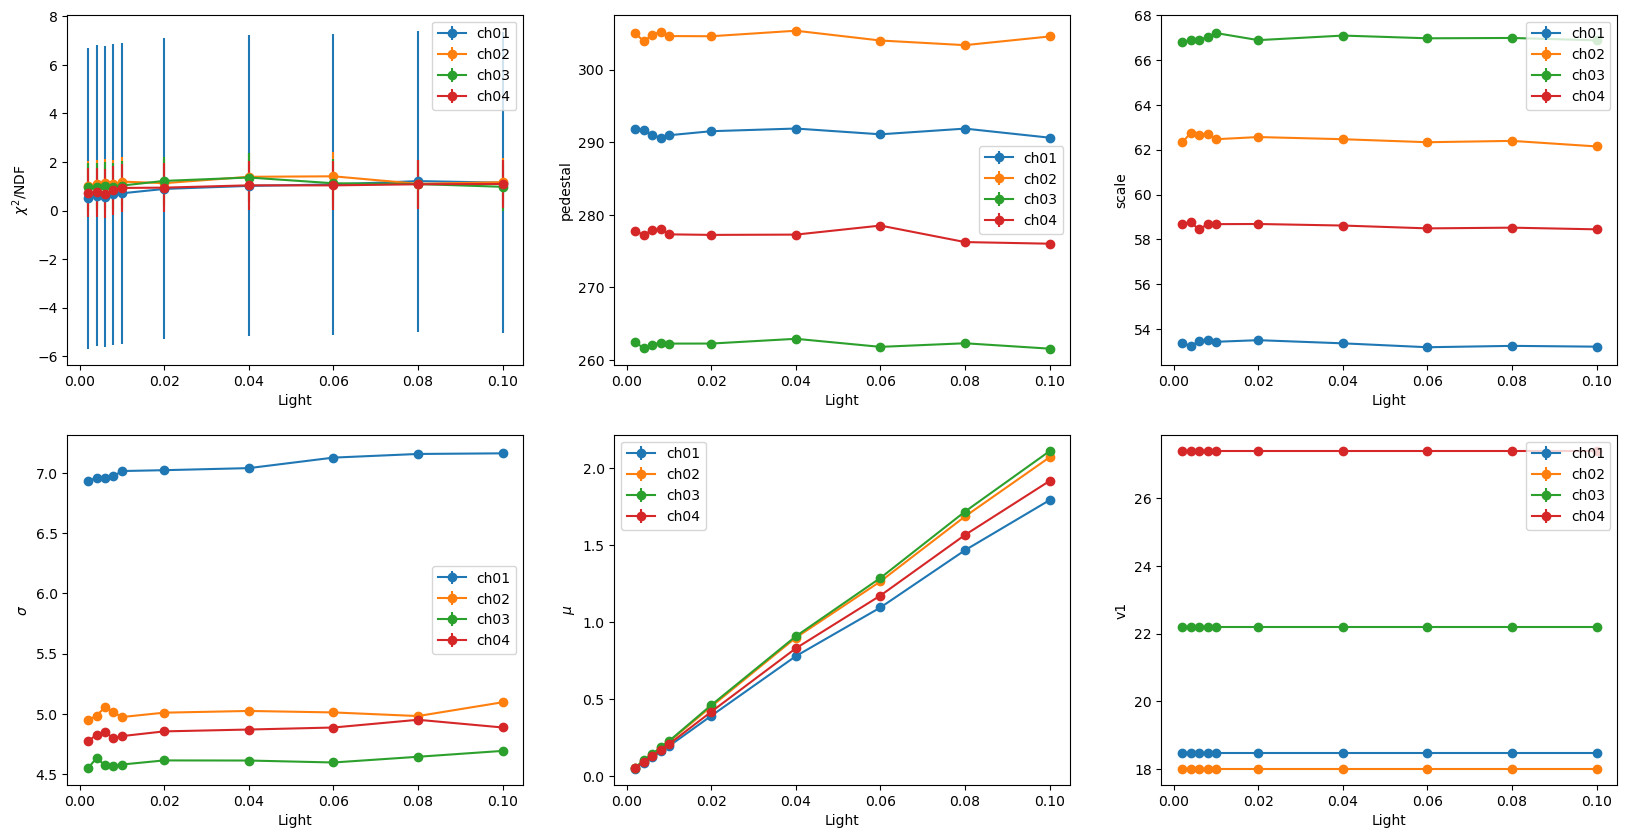

In [6]:
fig, axs = plt.subplots(2,3, figsize=(20,10), dpi=100)

paras = np.loadtxt("results/s_light_1100V_off/paras_iter06.txt")
xpoints = np.loadtxt("results/s_light_1100V_off/runs.txt")[:,1]
for i in range(4):
    axs[0,0].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 3], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 13], label="ch0"+str(i+1), fmt='o-')
axs[0,0].legend()
axs[0,0].set_xlabel('Light')
axs[0,0].set_ylabel(r"$\chi^2$/NDF")

for i in range(4):
    axs[0,1].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 4], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 14], label="ch0"+str(i+1), fmt='o-')
axs[0,1].legend()
axs[0,1].set_xlabel('Light')
axs[0,1].set_ylabel("pedestal")

for i in range(4):
    axs[0,2].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 5], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 15], label="ch0"+str(i+1), fmt='o-')
axs[0,2].legend()
axs[0,2].set_xlabel('Light')
axs[0,2].set_ylabel("scale")

for i in range(4):
    axs[1,0].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 6], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 16], label="ch0"+str(i+1), fmt='o-')
axs[1,0].legend()
axs[1,0].set_xlabel('Light')
axs[1,0].set_ylabel(r"$\sigma$")

for i in range(4):
    axs[1,1].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 7], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 17], label="ch0"+str(i+1), fmt='o-')
axs[1,1].legend()
axs[1,1].set_xlabel('Light')
axs[1,1].set_ylabel(r"$\mu$")

for i in range(4):
    axs[1,2].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 8], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 18], label="ch0"+str(i+1), fmt='o-')
axs[1,2].legend()
axs[1,2].set_xlabel('Light')
axs[1,2].set_ylabel("v1")

#### PMT S Light 1100V on, 10 parameters

Text(0, 0.5, 'v1')

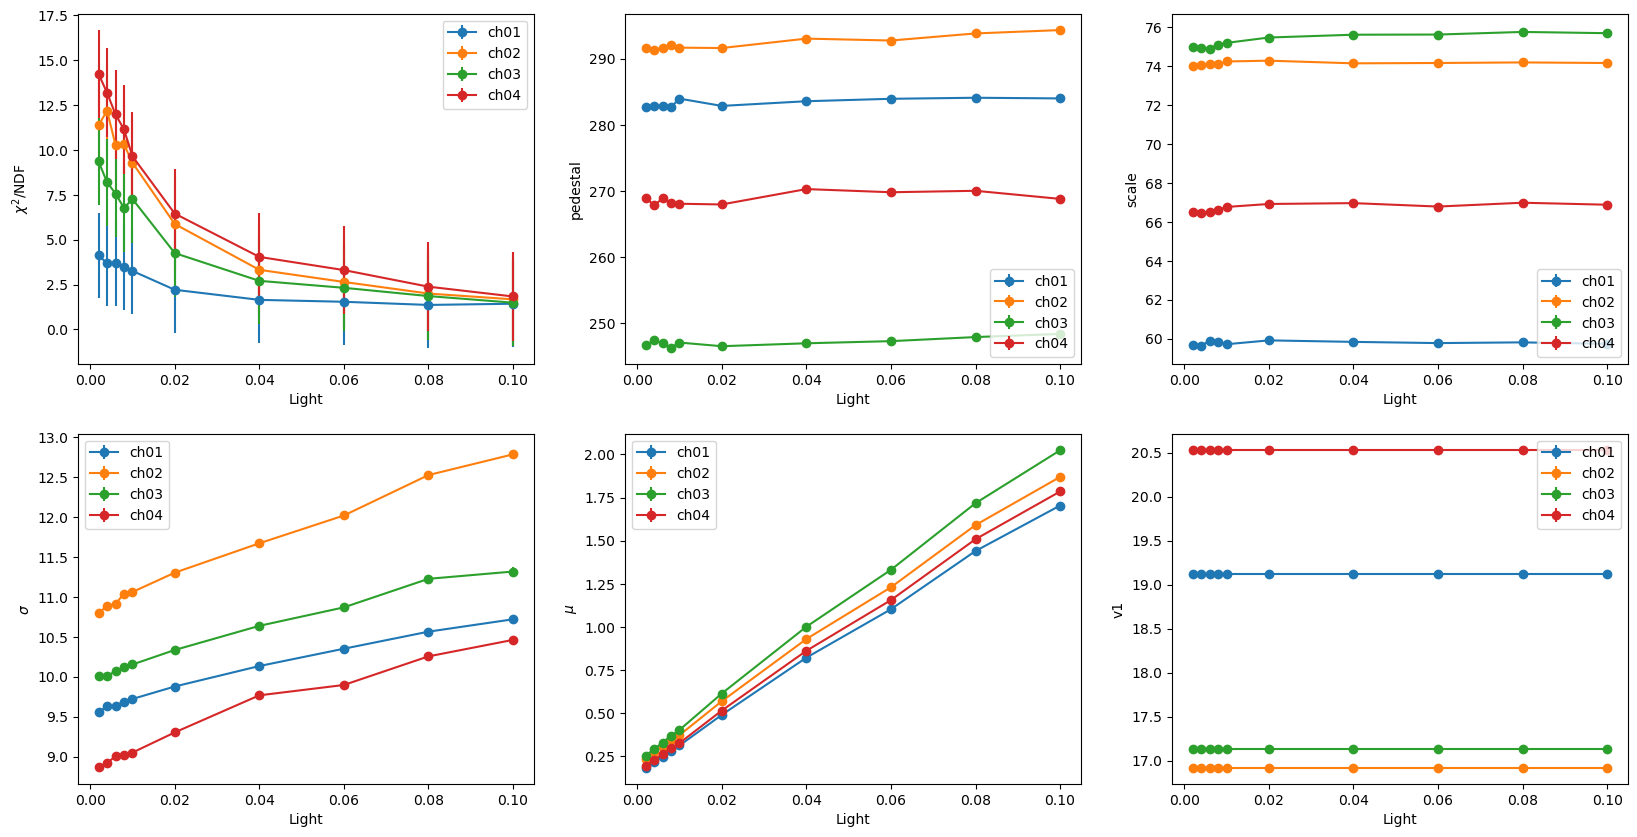

In [7]:
fig, axs = plt.subplots(2,3, figsize=(20,10), dpi=100)

paras = np.loadtxt("results/s_light_1100V_on/paras_iter06.txt")
xpoints = np.loadtxt("results/s_light_1100V_on/runs.txt")[:,1]
for i in range(4):
    axs[0,0].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 3], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 13], label="ch0"+str(i+1), fmt='o-')
axs[0,0].legend()
axs[0,0].set_xlabel('Light')
axs[0,0].set_ylabel(r"$\chi^2$/NDF")

for i in range(4):
    axs[0,1].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 4], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 14], label="ch0"+str(i+1), fmt='o-')
axs[0,1].legend()
axs[0,1].set_xlabel('Light')
axs[0,1].set_ylabel("pedestal")

for i in range(4):
    axs[0,2].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 5], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 15], label="ch0"+str(i+1), fmt='o-')
axs[0,2].legend()
axs[0,2].set_xlabel('Light')
axs[0,2].set_ylabel("scale")

for i in range(4):
    axs[1,0].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 6], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 16], label="ch0"+str(i+1), fmt='o-')
axs[1,0].legend()
axs[1,0].set_xlabel('Light')
axs[1,0].set_ylabel(r"$\sigma$")

for i in range(4):
    axs[1,1].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 7], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 17], label="ch0"+str(i+1), fmt='o-')
axs[1,1].legend()
axs[1,1].set_xlabel('Light')
axs[1,1].set_ylabel(r"$\mu$")

for i in range(4):
    axs[1,2].errorbar(xpoints, paras[xpoints.size*i:xpoints.size*(i+1), 8], yerr = paras[xpoints.size*i:xpoints.size*(i+1), 18], label="ch0"+str(i+1), fmt='o-')
axs[1,2].legend()
axs[1,2].set_xlabel('Light')
axs[1,2].set_ylabel("v1")